# Algorithms 202: Coursework 1 Task 1: Sorting

Group-ID: 23

Group members:
* John Oliver (jpo14)
* Bálint Rikker (br1414)
* Peng Peng (pp3613)

# Objectives

The aim of this coursework is to enhance your algorithmic skills by mastering the divide and conquer and dynamic programming strategies. You are asked to show that you can:

- implement divide and conquer solutions for given problems
- compare naive and advanced implementations of algorithms solving the same problem

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

The comparisons of different algorithms involve textual descriptions and graphical plots. For graphing you will be using [matplotlib](http://matplotlib.org/index.html) to generate plots. [This tutorial](http://matplotlib.org/index.html) will be useful to go through to get you up to speed. For the textual descriptions you may wish to use [LaTeX](http://en.wikipedia.org/wiki/LaTeX) inline like $\mathcal{O}(n\log{}n)$. Double click this cell to reveal the required markup - and [see here](http://texblog.org/2014/06/24/big-o-and-related-notations-in-latex/) for useful guidance on producing common symbols used in asymptotic run time analysis.

# Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [3]:
# so our plots get drawn in the notebook
%matplotlib inline
from matplotlib import pyplot as plt
from random import randint
from time import clock

# a timer - runs the provided function and reports the
# run time in ms
def time_f(f):
    before = clock()
    f()
    after = clock()
    return after - before

# remember - lambdas are just one line functions

# make us a random list length (between 1 - 2000)
rand_len = lambda max_len=2e3: randint(1, max_len)

# choose a random value for a list element (between 0 1e6)
rand_int = lambda: randint(0, 1e6)

# generate a random list of random length -
# here we use a list comprehension, a very tidy
# way of transforming lists of data
rand_list = lambda max_len=2e3: [rand_int() 
                                 for i in range(rand_len(max_len=max_len))]

# generate a random list of given length
def rlist(x):
    return [rand_int() for i in range(x)]

## Task 1: Sorting

In this task you are asked to implement `insertion_sort` and `merge_sort`. You need to perform an experimental analysis of their running time. Based on your analysis, you should implement a third sorting algorithm, `hybrid_sort`, which is similar to `merge_sort` but uses `insertion_sort` for the base case. The problem size for which the base case is invoked has to be inferred from the running time analysis.

### 1a. Implement `insertion_sort`

Complete the below definition for `insertion_sort`. Do not change the name of the function or it's arguments. 


Hints:

- Your sort should be in-place (i.e. it changes the input list for the caller) but you should also return the list so the function can be called as indicated below.

In [6]:
# an implementation of inplace insertion sort
def insertion_sort(a):
    if len(a) <= 1:
        return a
    # insert each element from 2nd to last to the list just before the element
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        # finding the right place to insert
        while (j >= 0 and a[j] > key):
            a[j + 1] = a[j]
            j -= 1
        # insert the element
        a[j + 1] = key
    return a

Use this test to confirm your implementation is correct.

In [7]:
# the number of test cases
num_tests = 1000

p = True
for x in range(0, num_tests):
    l = rand_list()
    l_copy = list(l)
    l_copy.sort()
    if not(l_copy == insertion_sort(l)):
        p = False
        break
print(p)

True


### 1b. Implement `merge_sort`

Complete the below definition for `merge_sort`. Do not change the name of the function or it's arguments.

Hints:

- Your implementation should leave the input list unmodified for the caller
- You are free to define other functions in this cell

In [8]:
# an implementation of merge sort does not modify given list
def merge_sort(a):
    length = len(a)
    if (length <= 1):
        return a
    # splitting the list
    sen   = length // 2
    # sort each half
    left  = merge_sort(a[:sen])
    right = merge_sort(a[sen:])
    # merging
    return list(merge(left, right))

# merge 2 sorted list
def merge(left, right):
    result = []
    while (len(left) > 0 and len(right) > 0):
        if (left[0] < right[0]):
            result.append(left[0])
            left = left[1:]
        else:
            result.append(right[0])
            right = right[1:]

    if (len(left) > 0):
        result += left[0:]
    if (len(right) > 0):
        result += right[0:]
    return result

Use this test to confirm your implementation is correct.

In [9]:
# number of test cases
num_tests = 1000

p = True
for x in range(0, num_tests):
    l = rand_list()
    l_ms = merge_sort(l)
    l.sort()
    if not(l == l_ms):
        p = False
        break
print(p)

True


### 1c. Analyse the running time performance of `insertion_sort` and `merge_sort`

Draw a graph showing the run time performance of your `insertion_sort` and `merge_sort` for different lengths of random integers. Analyse the performance at the large scale ($n \approx 10^3$) and small scale ($n \approx 10$). To remove noisy measurements, you might want to repeat the analysis several times and estimate average performance for different $n$.

(0, 0.00035)

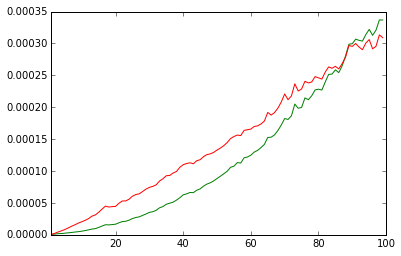

In [10]:
# time for insertion sort, time for merge sort, nunber of elements
insert_t, merge_t, n = [], [], []

# starting test list size
start = 1
# largest test list size
end = 100
# number of times to repeat test for each length, higher number produce smoother plot
feq = 500

# plotting
for x in range(start, end):
    t1 = 0
    t2 = 0
    for y in range(0, feq):
        l = rlist(x)
        t2 += time_f(lambda: merge_sort(l))
        t1 += time_f(lambda: insertion_sort(l))
    insert_t.append(t1 / float(feq))
    merge_t.append(t2 / float(feq))
    n.append(x)

plt.plot(n, insert_t, c='green')
plt.plot(n, merge_t, c='red')
plt.xlim(start)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

From the above plot, it can be seen that merge sort has $\mathcal{O}(n\log{}n)$ time complexity, while that for inserion sort is $n^2$. This means that as n (length of sorted list) increases, the rate of increase of time for merge sort is smaller than insertion sort, meaning that in the limit, merge sort is always faster than insertion sort. This is inline with the plot for large n ($n >= 1000$), where the graph for merge sort lies below the graph for insertion sort, and the gap between the graph widens as n increases. However, for small n ($n <= 90$), the plot shows that due to a smaller overhead, the graph of insertion sort lies below the graph of merge sort. Since the two graphs intersect at 0 and 90, and for the range $[0, 90]$, insertion sort is faster than merge sort, hybrid sort use insertion sort as a base case for lists of length strictly less than 90. For the best performance, we have chosen the threshold to be 80 (since at 80, there is a significant performance difference between merge sort and insertion sort, chosing 80 will allow hybrid sort to always perform better than merge sort and insertion sort).

### 1d. Implement `hybrid_sort()`

Implement `hybrid_sort()`, a `merge_sort()` variant which uses `insertion_sort()` for the base case. The problem size for which the base case is invoked has to be inferred from your above running time analysis.

In [12]:
# a hybrid sort that uses merge sort for large list
# and switch to insertion sort when the size of list is below threshold
threshold = 80

def hybrid_sort(a):
    length = len(a)
    if (length <= 1):
        return a
    # threshold reached
    if (length < threshold):
        return insertion_sort(a)
    sen   = length // 2
    left  = hybrid_sort(a[:sen])
    right = hybrid_sort(a[sen:])
    return list(merge(left, right))

Use this test to confirm your implementation is correct.

In [13]:
# number pf test cases
num_tests = 1000

p = True
for x in range(0, num_tests):
    l = rand_list()
    l_copy = list(l)
    l_copy.sort()
    if not(l_copy == hybrid_sort(l)):
        p = False
        break
print(p)

True


### 1e. Analyse all three sorting implementations together

Draw a graph showing the running time performance of your `insertion_sort()`, `merge_sort()` and `hybrid_sort()` for different lengths of random integers.

(0, 0.0014)

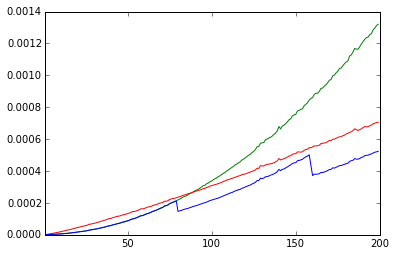

In [14]:
# time for insertion sort, time for merge sort, time for hybrid sort, nunber of elements
insert_t, merge_t, hybrid_t, n = [], [], [], []

# starting test list size
start = 1
# largest test list size
end = 200
# number of times to repeat test for each length, higher number produce smoother plot
feq = 500

# plotting
for x in range(start, end):
    t1 = 0
    t2 = 0
    t3 = 0
    for y in range(0, feq):
        l = rlist(x)
        l_copy = list(l)
        t2 += time_f(lambda: merge_sort(l))
        t1 += time_f(lambda: insertion_sort(l))
        t3 += time_f(lambda: hybrid_sort(l_copy))
    insert_t.append(t1 / feq)
    merge_t.append(t2 / feq)
    hybrid_t.append(t3 / feq)
    n.append(x)
plt.plot(n, insert_t, c='green')
plt.plot(n, merge_t, c='red')
plt.plot(n, hybrid_t, c='blue')

plt.xlim(start)
plt.ylim(0)

**Now discuss your findings in a few lines in the below cell:**

In the plot above, it can be seen that the graph of hybrid sort follows the graph of insertion sort until the graph of insertion sort almost intersect with the graph of merge sort. From there onwards, the graph of hybrid sort follows the same general trend as that of the graph of merge sort. However, the graph of hybrid sort is oscilating up and down and always lie below that of merge sort. This is because for large n hybrid sort perform the same operation as merge sort, but the running time of base case of hybrid sort is improved by insertion sort. The oscillation is due to the fact that the difference in running time between merge sort and insertion sort between 0 and 80 (the chosen threshold) is varying. More specifically, the difference in running time first increases slightly and then deceases from 40 (the smallest possible base case = threshold / 2) to 80. As n increases, the average size of lists that triggered the base case of hybrid sort goes in a period from 40 to 80. This is why the difference in running time between hybrid sort and merge sort goes in a perid where it first increases slightly and then decreases to a minimal (base case size approach 80) and then abruptly widens as the base case size becomes approximately 40 again.